In [32]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import re
import os

In [2]:
# Route
projRoot = Path.cwd().parents[0]
path_stage3 = projRoot.joinpath('data/stage3')
filepath = sorted(path_stage3.rglob('*.csv'))

In [48]:
df = pd.read_csv(filepath[0])

In [76]:
def yearly_summary(data, variable):
    descriptive = data.groupby('學年度').agg({f'{variable}': ['mean', 'std', 'count']})
    yearly_means = data.groupby(data['學年度'])[f'{variable}'].mean()
    plt.plot(yearly_means.index.astype(int), yearly_means.values, color='c')
    plt.xticks(np.arange(yearly_means.index.min(), yearly_means.index.max()+1, 1))
    '''
    boxplot_data = [data[data['學年度'] == year][f'{variable}'].dropna() for year in yearly_means.index]
    plt.boxplot(boxplot_data, positions=yearly_means.index, widths=0.4, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='c'))
        '''
    return print(descriptive)


### 1. 學生規模和在學穩定度 (2-2-1) 日間學制學士班及專科正式學籍在學學生人數
資料來源：學1-2

          在學學生數小計                   
             mean          std count
學年度                                 
2016          NaN          NaN     0
2017  5774.251572  3968.083971   159
2018  5760.761290  4071.232500   155
2019  5611.889610  4073.061094   154
2020  5481.110390  4130.735505   154
2021  5521.125828  4208.010479   151
2022  5328.900000  4144.198859   150


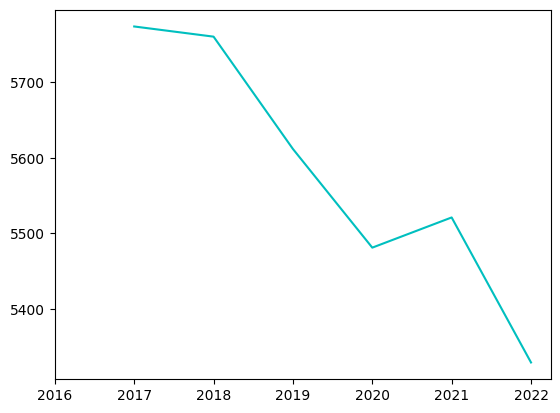

In [77]:
yearly_summary(df, '在學學生數小計')

### 2. 學生規模和在學穩定度 (2-2-2) 日間學制學士班及專科新生註冊率(不含境外生) 
$$ 計算公式：\frac{\text{當學年度總量內新生招生核定名額之實際註冊人數(C)}}{(\text{當學年度總量內核定新生招生名額(A)} - \text{當學年度新生保留入學資格人數(B)})} $$

資料來源：學12-2

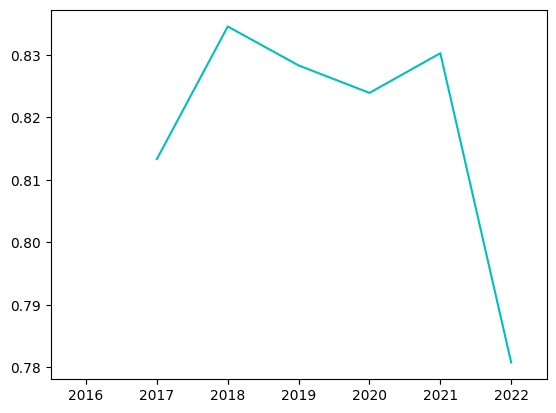

(     日間學制學士班及專科新生註冊率(不含境外生)                
                        mean       std count
 學年度                                        
 2016                    NaN       NaN     0
 2017               0.813334  0.199749   159
 2018               0.834567  0.175349   155
 2019               0.828331  0.184127   154
 2020               0.823932  0.208103   153
 2021               0.830285  0.207891   149
 2022               0.780758  0.214669   146,
 None)

In [57]:
df['日間學制學士班及專科新生註冊率(不含境外生)'] = df['當學年度總量內新生招生核定名額之實際註冊人數(C)'] / (df['當學年度總量內核定新生招生名額(A)'] - df['當學年度新生保留入學資格人數(B)'])
yearly_summary(df, '日間學制學士班及專科新生註冊率(不含境外生)')

### 3. 學生規模和在學穩定度 (2-2-3) 日間學制學士班及專科新生註冊率(含境外生) 
$$ 計算公式： \frac{(當學年度總量內新生招生核定名額之實際註冊人數(C) + 當學年度各學系境外(新生)學生實際註冊人數 (E))}{(當學年度總量內核定新生招生名額(A) - 當學年度新生保留入學資格人數(B) + 當學年度各學系境外(新生)學生實際註冊人數 (E))} $$

資料來源：學12-2

     日間學制學士班及專科新生註冊率(含境外生)                
                      mean       std count
學年度                                       
2016                   NaN       NaN     0
2017                   NaN       NaN     0
2018                   NaN       NaN     0
2019                   NaN       NaN     0
2020              0.830405  0.200418   153
2021              0.838637  0.197044   149
2022              0.792943  0.205845   146


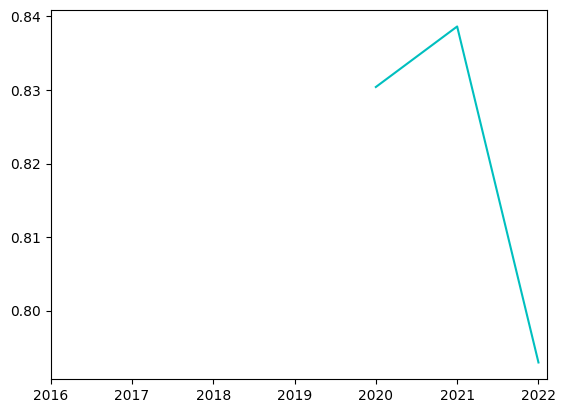

(None, None)

In [7]:
df['日間學制學士班及專科新生註冊率(含境外生)'] = (df['當學年度總量內新生招生核定名額之實際註冊人數(C)'] + df['當學年度各學系境外(新生)學生實際註冊人數 (E)']) / (df['當學年度總量內核定新生招生名額(A)'] - df['當學年度新生保留入學資格人數(B)'] + df['當學年度各學系境外(新生)學生實際註冊人數 (E)'])
yearly_summary(df, '日間學制學士班及專科新生註冊率(含境外生)')

### 4. 學生規模和在學穩定度 (2-2-4) 日間學制學士班及專科境外新生實際註冊人數占總註冊人數比率 
$$ 計算公式：\frac{\text{當學年度各學系境外(新生)學生實際註冊人數 (E)}}{(\text{當學年度各學系境外(新生)學生實際註冊人數 (E)} + \text{當學年度總量內新生招生核定名額之實際註冊人數(C)})}$$

資料來源：學12-2

     日間學制學士班及專科境外新生實際註冊人數占總註冊人數比率                
                             mean       std count
學年度                                              
2016                          NaN       NaN     0
2017                          NaN       NaN     0
2018                          NaN       NaN     0
2019                          NaN       NaN     0
2020                     0.049884  0.062217   153
2021                     0.058775  0.076315   149
2022                     0.069834  0.083012   146


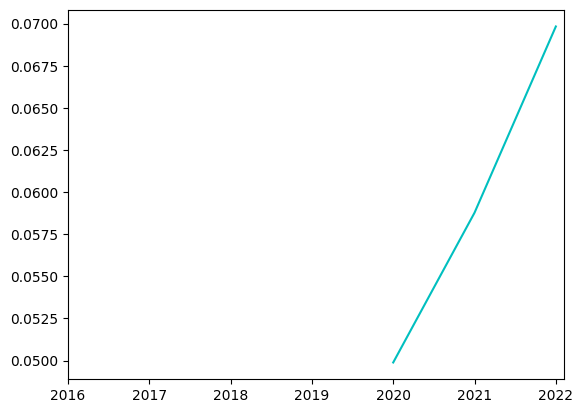

(None, None)

In [8]:
df['日間學制學士班及專科境外新生實際註冊人數占總註冊人數比率'] = df['當學年度各學系境外(新生)學生實際註冊人數 (E)'] / (df['當學年度各學系境外(新生)學生實際註冊人數 (E)'] + df['當學年度總量內新生招生核定名額之實際註冊人數(C)'])
yearly_summary(df, '日間學制學士班及專科境外新生實際註冊人數占總註冊人數比率')

### 5. 學生規模和在學穩定度 (2-2-5) 日間學制學士班及專科休學人數比率(於學年底處於休學狀態)
$$ 計算公式：\frac{\text{於學年底處於休學狀態之人數-總計-第2學期}}{\text{在學學生數小計}}$$

資料來源：學1-2、學13-2

     日間學制學士班及專科休學人數比率(於學年底處於休學狀態)                
                             mean       std count
學年度                                              
2016                          NaN       NaN     0
2017                     0.060323  0.045838   153
2018                     0.056878  0.040097   154
2019                     0.057675  0.034864   154
2020                     0.056096  0.036315   151
2021                     0.051763  0.037321   151
2022                          NaN       NaN     0


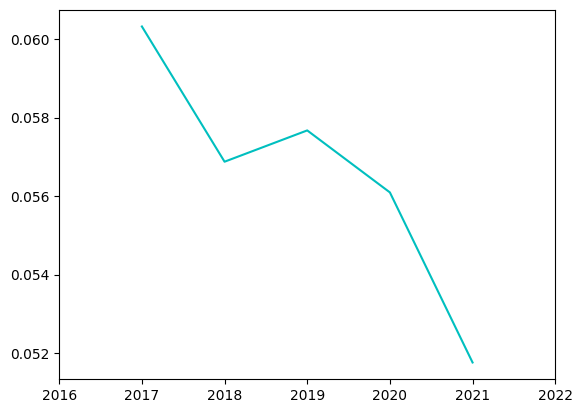

(None, None)

In [9]:
df['日間學制學士班及專科休學人數比率(於學年底處於休學狀態)'] = df['於學年底處於休學狀態之人數-總計-第2學期'] / df['在學學生數小計']
yearly_summary(df, '日間學制學士班及專科休學人數比率(於學年底處於休學狀態)')

### 6. 學生規模和在學穩定度 (2-2-7) 日間學制學士班及專科退學人數比率
$$ 計算公式：\frac{(\text{學期間退學人數-小計-第1學期} + \text{學期間退學人數-小計-第2學期})}{\text{在學學生數小計}}$$

資料來源：學1-2、學14-2

     日間學制學士班及專科退學人數比率                
                 mean       std count
學年度                                  
2016              NaN       NaN     0
2017         0.072984  0.056983   155
2018         0.073610  0.054783   154
2019         0.079796  0.059163   154
2020         0.077289  0.054353   150
2021         0.082628  0.079601   151
2022              NaN       NaN     0


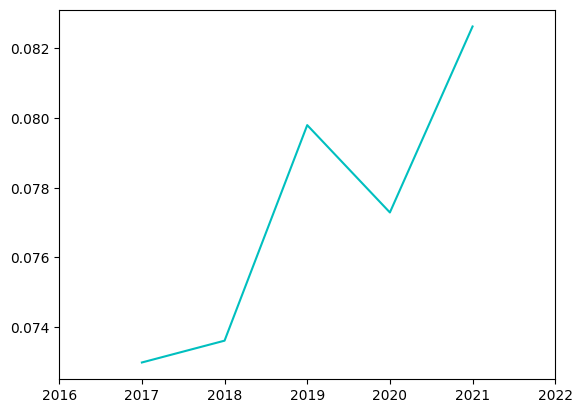

(None, None)

In [10]:
df['日間學制學士班及專科退學人數比率'] = (df['學期間退學人數-小計-第1學期'] + df['學期間退學人數-小計-第2學期']) / df['在學學生數小計']
yearly_summary(df, '日間學制學士班及專科退學人數比率')

### 7. 學生規模和在學穩定度 (2-2-8) 日間學制學士班及專科延修人數比率
$$ 計算公式：\frac{\text{申請延長修業年限因素之學生人數-小計}}{\text{在學學生數小計}}$$

資料來源：學1-2、學14-2

     日間學制學士班及專科延修人數比率                
                 mean       std count
學年度                                  
2016              NaN       NaN     0
2017         0.043924  0.021990   158
2018         0.045747  0.022362   152
2019         0.047532  0.024370   153
2020         0.049519  0.024849   152
2021         0.049695  0.026853   151
2022         0.053110  0.030471   149


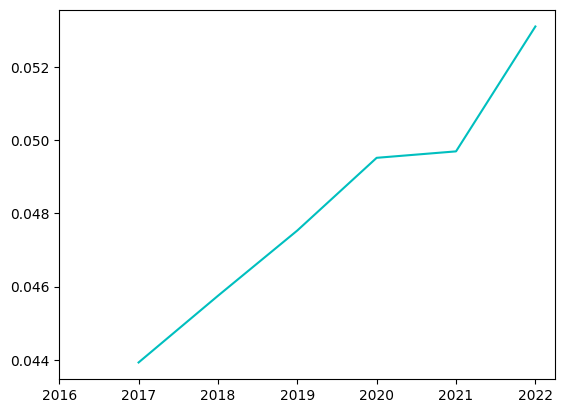

(None, None)

In [11]:
df['日間學制學士班及專科延修人數比率'] = df['申請延長修業年限因素之學生人數-小計'] / df['在學學生數小計']
yearly_summary(df, '日間學制學士班及專科延修人數比率')

### 8. 學生規模和在學穩定度 (2-2-9) 日間學制學士班及專科就學穩定率
$$ 計算公式：\frac{\text{當學年度2年級在學學生數(B)}}{\text{前一學年度錄取1年級在學學生人數(A)}}$$

資料來源：學16

     日間學制學士班及專科就學穩定率                
                mean       std count
學年度                                 
2016             NaN       NaN     0
2017             NaN       NaN     0
2018        0.882804  0.079610   155
2019        0.886143  0.080327   154
2020        0.881438  0.109092   154
2021        0.888356  0.077521   151
2022        0.882773  0.099361   149


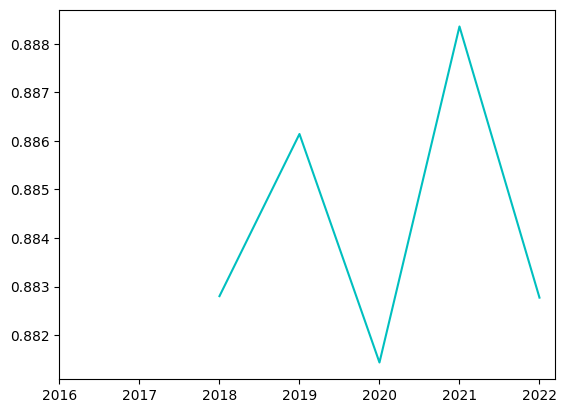

(None, None)

In [12]:
df['日間學制學士班及專科就學穩定率'] = df['當學年度2年級在學學生數(B)'] / df['前一學年度錄取1年級在學學生人數(A)']
yearly_summary(df, '日間學制學士班及專科就學穩定率')

### 9. 學生學習資源投入 (2-3-1) 平均每位專任輔導人員服務正式學籍在學學生人數
$$ 計算公式：\frac{在學學生數小計}{上下學期平均輔導人員數}$$

資料來源：教8、學1-2

     平均每位專任輔導人員服務正式學籍在學學生人數                  
                       mean         std count
學年度                                          
2016                    NaN         NaN     0
2017            1235.638547  640.788058   155
2018            1103.695822  547.940911   151
2019            1012.612268  479.843945   152
2020             973.940362  582.834789   150
2021             907.630511  438.184445   148
2022                    NaN         NaN     0


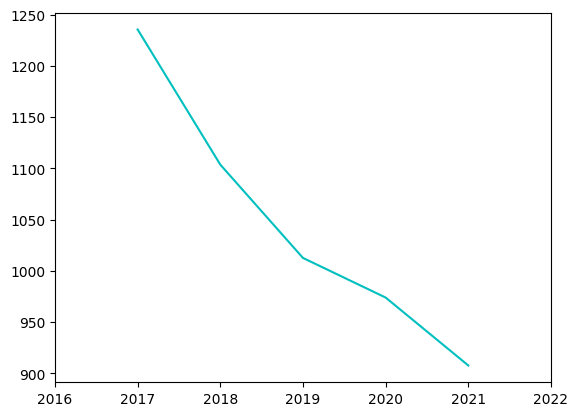

(None, None)

In [13]:
df["上下學期平均輔導人員數"] = (df['輔導人員數-專任-第1學期'].fillna(df['輔導人員數-專任-第2學期']) + df['輔導人員數-專任-第2學期'].fillna(df['輔導人員數-專任-第1學期'])) / 2
df['平均每位專任輔導人員服務正式學籍在學學生人數'] = df['在學學生數小計']/ df["上下學期平均輔導人員數"]
df['平均每位專任輔導人員服務正式學籍在學學生人數'] = df['平均每位專任輔導人員服務正式學籍在學學生人數'].replace(np.inf, np.nan) # 0個專任輔道員的學校其數字會是無限大，取代為np.nan
yearly_summary(df, '平均每位專任輔導人員服務正式學籍在學學生人數')

### 10. 師資結構和教師增能 (2-4-1) 專任教師總數
資料來源：教1-2

     專任教師數-教師總數總計                  
             mean         std count
學年度                                
2016          NaN         NaN     0
2017   292.975309  242.947530   162
2018   294.704403  251.151111   159
2019   292.436709  252.954049   158
2020   290.379747  256.109367   158
2021   287.929936  265.869645   157
2022   285.019231  269.093999   156


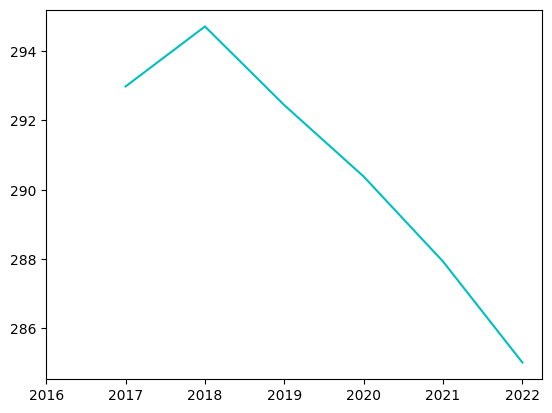

(None, None)

In [14]:
yearly_summary(df, '專任教師數-教師總數總計')

### 11. 師資結構和教師增能 (2-4-2) 專任教師之助理教授以上人數比率
$$ 計算公式：\frac{\text{專任助理教授以上人數-總計}}{\text{專任教師數-教師總數總計}}$$

資料來源：教1-2

     專任教師之助理教授以上人數比率                
                mean       std count
學年度                                 
2016             NaN       NaN     0
2017        0.804784  0.191957   162
2018        0.810514  0.189842   159
2019        0.818154  0.186788   158
2020        0.824941  0.184967   158
2021        0.833870  0.184991   157
2022        0.840199  0.185862   156


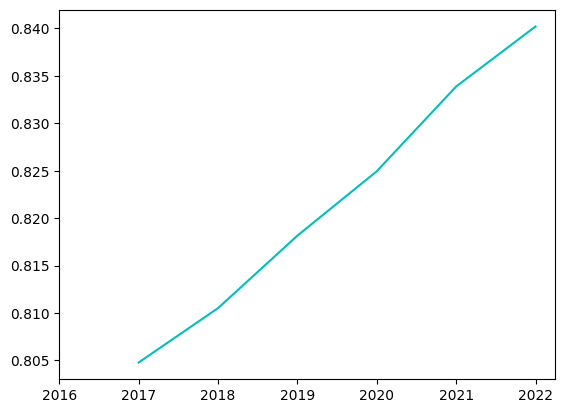

In [78]:
df['專任教師之助理教授以上人數比率'] = df['專任助理教授以上人數-總計'] / df['專任教師數-教師總數總計']
yearly_summary(df, '專任教師之助理教授以上人數比率')

### 12. 師資結構和教師增能 (2-4-3) 專任教師之編制外教師人數比率
$$ 計算公式：\frac{\text{編制外(專案教師、專業技術人員、專業技術教師)專任教師數(不包括其他教師)-總數}}{\text{專任教師數(不含其他教師)}}$$

資料來源：教11

     專任教師之編制外教師人數比率                
               mean       std count
學年度                                
2016            NaN       NaN     0
2017            NaN       NaN     0
2018       0.096019  0.113667   159
2019       0.106571  0.117142   158
2020       0.113476  0.117761   158
2021       0.114818  0.101978   157
2022       0.115147  0.116392   156


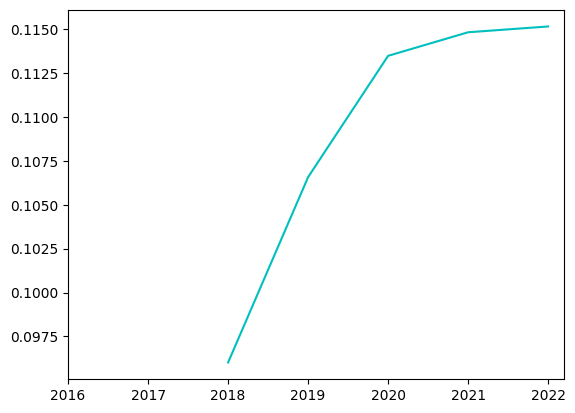

In [79]:
df['專任教師之編制外教師人數比率'] = df['編制外(專案教師、專業技術人員、專業技術教師)專任教師數(不包括其他教師)-總數'] / df['專任教師數(不含其他教師)']
yearly_summary(df, '專任教師之編制外教師人數比率')

### 13. 師資結構和教師增能 (2-4-3) 兼任教師總數
資料來源：教2-2

     兼任教師數-教師總數總計                  
             mean         std count
學年度                                
2016          NaN         NaN     0
2017   263.271605  216.386818   162
2018   265.601266  221.456641   158
2019   268.675159  224.115333   157
2020   270.337580  227.823525   157
2021   272.980769  240.427830   156
2022   270.929032  251.094800   155


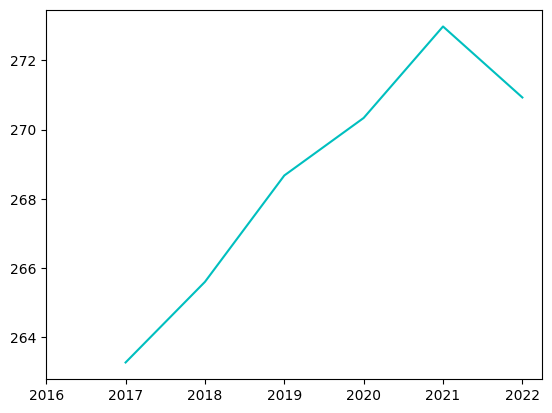

In [80]:
yearly_summary(df, '兼任教師數-教師總數總計')

### 14. 師資結構和教師增能 (2-4-5) 兼任教師與專任教師數比率
$$ 計算公式：\frac{\text{兼任教師數-教師總數總計}}{\text{專任教師數-教師總數總計}}$$

資料來源：教2-2、教1-2

     兼任教師與專任教師數比率                
             mean       std count
學年度                              
2016          NaN       NaN     0
2017     0.981124  0.605340   162
2018     0.993737  0.628416   158
2019     1.025760  0.623374   157
2020     1.040426  0.677162   157
2021     1.024542  0.669600   156
2022     1.028979  0.658547   155


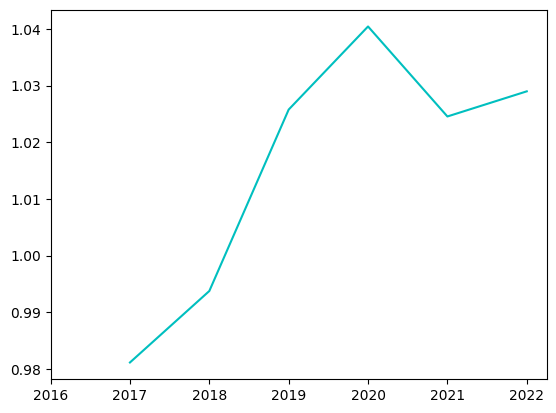

In [81]:
df['兼任教師與專任教師數比率'] = df['兼任教師數-教師總數總計'] / df['專任教師數-教師總數總計']
yearly_summary(df, '兼任教師與專任教師數比率')

### 15. 師資結構和教師增能 (2-4-6) 日間制生師比
$$ 計算公式：\frac{\text{日間學制學生數}}{\text{日間專任教師(含助教)}}$$

資料來源：教5

         日間制生師比                
           mean       std count
學年度                            
2016        NaN       NaN     0
2017  22.263847  6.428279   162
2018  22.063530  6.561919   159
2019  21.645487  6.328516   158
2020  21.024624  6.487274   158
2021  20.911821  6.975952   157
2022  20.437882  6.900483   156


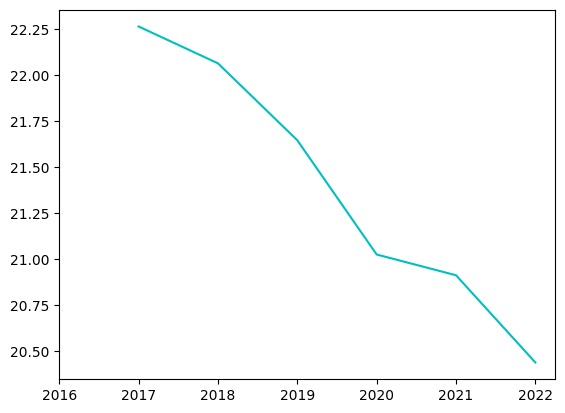

In [82]:
df['日間制生師比'] = df['日間學制學生數'] / df['日間專任教師(含助教)']
yearly_summary(df, '日間制生師比')